In [3]:
# パッケージのimport
import glob
import json
import os.path as osp
import random

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
from PIL import Image
from torchvision import models, transforms

from tqdm import tqdm

%matplotlib inline

In [7]:
# 乱数のシードを設定
torch.manual_seed(1234)
np.random.seed(1234)
random.seed(1234)

ogawa = '/home/toshiya/Workspace/learning/pytorch_advanced/1_image_classification/'

In [6]:
class ImageTransform():
    def __init__(self, resize, mean, std):
        self.data_transform = {
            'train': transforms.Compose([
                transforms.RandomResizedCrop(resize, scale=(0.5, 1.0)),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
            ]),
            'val': transforms.Compose([
                transforms.Resize(resize),
                transforms.CenterCrop(resize),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
            ])
        }
    def __call__(self, img, phase='train'):
        return self.data_transform[phase](img)

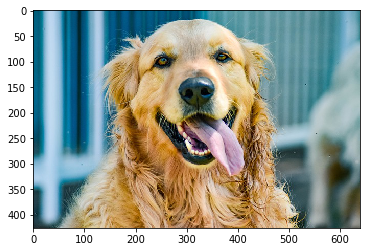

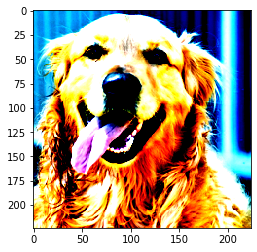

In [29]:
image_file_path = osp.join(ogawa,'data/goldenretriever-3724972_640.jpg')
img = Image.open(image_file_path)

plt.imshow(img)
plt.show()

resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
transform = ImageTransform(resize, mean, std)
img_transformed = transform(img, phase='train')

img_transformed = img_transformed.numpy().transpose((1,2,0))
img_transformed = np.clip(img_transformed, 0, 1)
plt.imshow(img_transformed)
plt.show()

In [47]:
def make_detapath_list(phase='train'):
    root = osp.join(ogawa,"data/hymenoptera_data/")
    target_path = osp.join(root+phase+'/*/*.jpg')
    print(target_path)
    
    path_list = []
    for p in glob.glob(target_path):
        path_list.append(p)
    return path_list

In [48]:
train_list = make_detapath_list('train')
val_list = make_detapath_list('val')

val_list

/home/toshiya/Workspace/learning/pytorch_advanced/1_image_classification/data/hymenoptera_data/train/*/*.jpg
/home/toshiya/Workspace/learning/pytorch_advanced/1_image_classification/data/hymenoptera_data/val/*/*.jpg


['/home/toshiya/Workspace/learning/pytorch_advanced/1_image_classification/data/hymenoptera_data/val/ants/153783656_85f9c3ac70.jpg',
 '/home/toshiya/Workspace/learning/pytorch_advanced/1_image_classification/data/hymenoptera_data/val/ants/172772109_d0a8e15fb0.jpg',
 '/home/toshiya/Workspace/learning/pytorch_advanced/1_image_classification/data/hymenoptera_data/val/ants/459442412_412fecf3fe.jpg',
 '/home/toshiya/Workspace/learning/pytorch_advanced/1_image_classification/data/hymenoptera_data/val/ants/412436937_4c2378efc2.jpg',
 '/home/toshiya/Workspace/learning/pytorch_advanced/1_image_classification/data/hymenoptera_data/val/ants/35558229_1fa4608a7a.jpg',
 '/home/toshiya/Workspace/learning/pytorch_advanced/1_image_classification/data/hymenoptera_data/val/ants/57264437_a19006872f.jpg',
 '/home/toshiya/Workspace/learning/pytorch_advanced/1_image_classification/data/hymenoptera_data/val/ants/562589509_7e55469b97.jpg',
 '/home/toshiya/Workspace/learning/pytorch_advanced/1_image_classificat